In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [3]:
df_airline = pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


## As there is only one row we will drop that as we dont want to replace that

In [6]:
df_airline.dropna(axis=0,inplace=True)

In [7]:
df_airline.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [8]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


## As the month is the type object what we do is to convert it into datetime

In [9]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [10]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [11]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [12]:
df_airline.set_index('Month',inplace=True)

In [13]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


## The below plot is the seasonal data 

<AxesSubplot:xlabel='Month'>

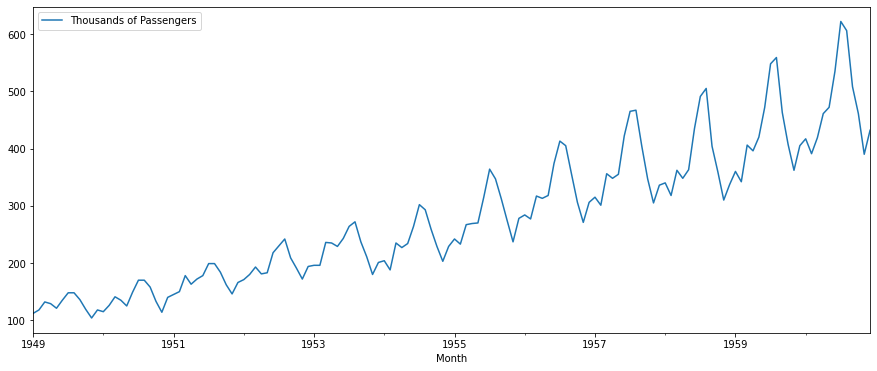

In [15]:
df_airline.plot(figsize = (15,6))

## confirm if the above plot is stationary or not by using the DickeyFuller Test

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if(result[1]<=0.05):
        print("Strong evidence against the null hypothesis, reject the null hupothesis. Data is stationary")
    else:
                print("Weak evidence against the null hypothesis, time series has a unit root. Hence the data is not stationary")

In [18]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060433
p-value: 0.9918802434376409
Weak evidence against the null hypothesis, time series has a unit root. Hence the data is not stationary


### Now we know that the data is not stationary in order to make it stationary we will use a technique called as differencing

In [19]:
df_airline['passenger_first_difference'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(1)

In [20]:
df_airline.head()

,Thousands of Passengers,passenger_first_difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [21]:
df_airline.tail()

,Thousands of Passengers,passenger_first_difference
Month,,
1960-08-01,606.0,-16.0
1960-09-01,508.0,-98.0
1960-10-01,461.0,-47.0
1960-11-01,390.0,-71.0
1960-12-01,432.0,42.0


In [22]:
adf_test(df_airline['passenger_first_difference'].dropna())

ADF Statistics: -2.8292668241699954
p-value: 0.05421329028382609
Weak evidence against the null hypothesis, time series has a unit root. Hence the data is not stationary


### again do differencing

In [25]:
df_airline['passenger_second_difference'] = df_airline['passenger_first_difference'] - df_airline['passenger_first_difference'].shift(1)

### From the below we can see that the data is now stationary

In [27]:
adf_test(df_airline['passenger_second_difference'].dropna())

ADF Statistics: -16.3842315424685
p-value: 2.7328918500142407e-29
Strong evidence against the null hypothesis, reject the null hupothesis. Data is stationary


### For seasonal data we can directly apply for 12 months difference

In [31]:
df_airline['passenger_12_difference'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(12)

In [32]:
adf_test(df_airline['passenger_12_difference'].dropna())

ADF Statistics: -3.3830207264924814
p-value: 0.011551493085514952
Strong evidence against the null hypothesis, reject the null hupothesis. Data is stationary


### plotting acf and pacf 

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

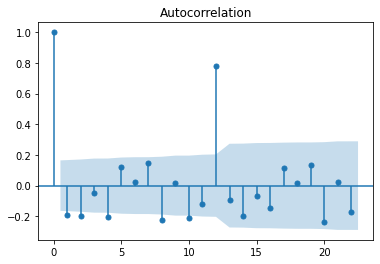

In [34]:
acf = plot_acf(df_airline['passenger_second_difference'].dropna())

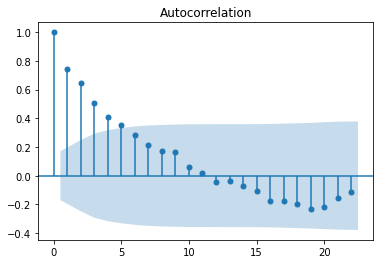

In [36]:
acf_12 = plot_acf(df_airline['passenger_12_difference'].dropna())

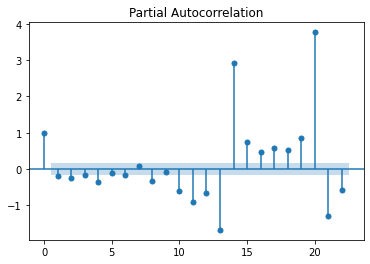

In [37]:
result= plot_pacf(df_airline['passenger_second_difference'].dropna())

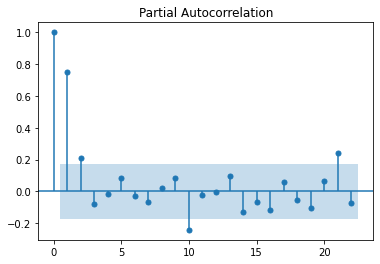

In [38]:
result12= plot_pacf(df_airline['passenger_12_difference'].dropna())

In [39]:
df_airline

,Thousands of Passengers,passenger_first_difference,passenger_second_difference,passenger_12_difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


### split train and test data

In [40]:
from datetime import datetime,timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [41]:
train_data = df_airline[:train_dataset_end]
test_data = df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [42]:
## prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [43]:
test_data

,Thousands of Passengers,passenger_first_difference,passenger_second_difference,passenger_12_difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


## ARIMA model

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [45]:
train_data

,Thousands of Passengers,passenger_first_difference,passenger_second_difference,passenger_12_difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [78]:
model_arima = ARIMA(train_data['Thousands of Passengers'],order=(10,2,0))

C:\Users\siddu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\siddu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [79]:
model_arima_fit = model_arima.fit()

In [80]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                        ARIMA(10, 2, 0)   Log Likelihood                -357.239
Method:                               css-mle   S.D. of innovations             18.333
Date:                        Fri, 01 Jul 2022   AIC                            738.477
Time:                                15:34:45   BIC                            767.358
Sample:                            03-01-1949   HQIC                           750.072
                                 - 12-01-1955                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0163      0.347      0.047      0.962      -0.665       0.697
ar.L1.D2.Thousands of Passengers     -0.5165      0.097     -5.300      0.000      -0.707      -0.325
ar.L2.D2.Thousands of Passengers     -0.7203      0.108     -6.650      0.000      -0.933      -0.508
ar.L3.D2.Thousands of Passengers     -0.4856      0.120     -4.032      0.000      -0.722      -0.250
ar.L4.D2.Thousands of Passengers     -0.7506      0.131     -5.717      0.000      -1.008      -0.493
ar.L5.D2.Thousands of Passengers     -0.5065      0.151     -3.360      0.001      -0.802      -0.211
ar.L6.D2.Thousands of Passengers     -0.5204      0.149     -3.500      0.000      -0.812      -0.229
ar.L7.D2.Thousands of Passengers     -0.3055      0.136     -2.250      0.024      -0.572      -0.039
ar.L8.D2.Thousands of Passengers     -0.5943      0.125     -4.744      0.000      -0.840      -0.349
ar.L9.D2.Thousands of Passengers     -0.2966      0.116     -2.556      0.011      -0.524      -0.069
ar.L10.D2.Thousands of Passengers    -0.4826      0.101     -4.765      0.000      -0.681      -0.284
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9098           -0.5670j            1.0720           -0.0887
AR.2             0.9098           +0.5670j            1.0720            0.0887
AR.3             0.4844           -0.9210j            1.0406           -0.1729
AR.4             0.4844           +0.9210j            1.0406            0.1729
AR.5            -0.9676           -0.4146j            1.0527           -0.4356
AR.6            -0.9676           +0.4146j            1.0527            0.4356
AR.7            -0.6004           -0.8889j            1.0726           -0.3445
AR.8            -0.6004           +0.8889j            1.0726            0.3445
AR.9            -0.1335           -1.1349j            1.1427           -0.2686
AR.10           -0.1335           +1.1349j            1.1427            0.2686
------------------------------------------------------------------------------
"""

In [81]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [82]:
pred = model_arima_fit.predict(start = pred_start_date, end = pred_end_date)
residuals = test_data['Thousands of Passengers']-pred

C:\Users\siddu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [83]:
residuals

Month
1956-01-01    302.695985
1956-02-01    289.830780
1956-03-01    319.329651
1956-04-01    328.562194
1956-05-01    298.689310
1956-06-01    354.352104
1956-07-01    426.271461
1956-08-01    441.529611
1956-09-01    350.001334
1956-10-01    315.913227
1956-11-01    242.711512
1956-12-01    281.647800
1957-01-01    333.119969
1957-02-01    304.741427
1957-03-01    367.652386
1957-04-01    343.198172
1957-05-01    343.325753
1957-06-01    413.019368
1957-07-01    483.932075
1957-08-01    477.557302
1957-09-01    403.265271
1957-10-01    346.226392
1957-11-01    281.802358
1957-12-01    337.112077
1958-01-01    347.244780
1958-02-01    325.413831
1958-03-01    364.318107
1958-04-01    341.830120
1958-05-01    355.290686
1958-06-01    435.056477
1958-07-01    504.184575
1958-08-01    505.771331
1958-09-01    405.976051
1958-10-01    350.193245
1958-11-01    301.548557
1958-12-01    341.117852
1959-01-01    364.677774
1959-02-01    347.031466
1959-03-01    403.339745
1959-04-01    392.1

<AxesSubplot:ylabel='Density'>

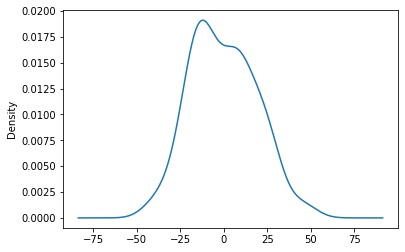

In [84]:
model_arima_fit.resid.plot(kind='kde')

In [85]:
test_data['Predicted_arima'] = pred

C:\Users\siddu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
test_data

,Thousands of Passengers,passenger_first_difference,passenger_second_difference,passenger_12_difference,Predicted_arima
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,-18.695985
1956-02-01,277.0,-7.0,-13.0,44.0,-12.830780
1956-03-01,317.0,40.0,47.0,50.0,-2.329651
1956-04-01,313.0,-4.0,-44.0,44.0,-15.562194
1956-05-01,318.0,5.0,9.0,48.0,19.310690
1956-06-01,374.0,56.0,51.0,59.0,19.647896
1956-07-01,413.0,39.0,-17.0,49.0,-13.271461
1956-08-01,405.0,-8.0,-47.0,58.0,-36.529611
1956-09-01,355.0,-50.0,-42.0,43.0,4.998666


<AxesSubplot:xlabel='Month'>

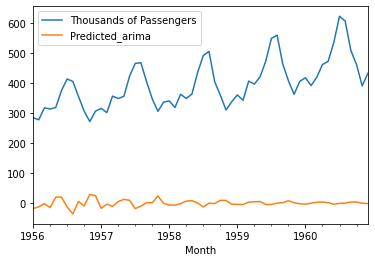

In [87]:
test_data[['Thousands of Passengers','Predicted_arima']].plot()